In [1]:
import os
print(os.listdir("../input"))
print(os.listdir("../input/datadev"))

['datadev']
['data-dev']


## Import fastai

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
import sys
print ("Python version:", sys.version)

Python version: 3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
[GCC 7.3.0]


In [4]:
from pathlib import Path

In [5]:
#root_p = Path('..\data-dev')   #local pc (cpu)
root_p = Path('../input/datadev/data-dev') #kaggle gpu
root_p.exists()

True

## Create Databunch
1. How to split the data into a training and validation sets?
2. How to split the data into a training and validation sets?
3. How to label the inputs?
4. What transforms to apply?
5. How to add a test set? (optional)
6. How to wrap in dataloaders and create the DataBunch?

In [6]:
tfms = get_transforms(do_flip=False, flip_vert=False, max_rotate=5.0, max_zoom=1.1, max_lighting=0.4, max_warp=0.20, p_affine=0.75, p_lighting=0.75)

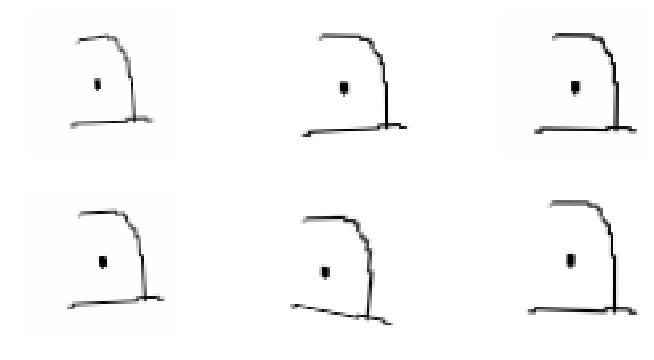

In [7]:
def get_ex(): return open_image('../input/datadev/data-dev/bet-2/bet-1.jpg')

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]
    
plots_f(2, 3, 12, 6, size=(56,56))

In [8]:
data = (ImageList.from_folder(root_p) #Where are the inputs and how to create them?
        .split_by_rand_pct(seed=1)    #How to split the data into a training and validation sets?
        .label_from_folder()
        .transform(tfms, size=(56,56))
        .databunch(bs=16)
        .normalize(imagenet_stats))

data

ImageDataBunch;

Train: LabelList (216 items)
x: ImageList
Image (3, 56, 56),Image (3, 56, 56),Image (3, 56, 56),Image (3, 56, 56),Image (3, 56, 56)
y: CategoryList
vav-7,vav-7,vav-7,vav-7,vav-7
Path: ../input/datadev/data-dev;

Valid: LabelList (54 items)
x: ImageList
Image (3, 56, 56),Image (3, 56, 56),Image (3, 56, 56),Image (3, 56, 56),Image (3, 56, 56)
y: CategoryList
vav-7,he-6,dalet-5,zayin-8,zayin-8
Path: ../input/datadev/data-dev;

Test: None

In [9]:
data.c, len(data.train_ds), len(data.valid_ds)

(9, 216, 54)

In [10]:
data.classes

['alef-1',
 'bet-2',
 'chet-9',
 'dalet-5',
 'gimel-4',
 'he-6',
 'vav-7',
 'vet-3',
 'zayin-8']

### Show data

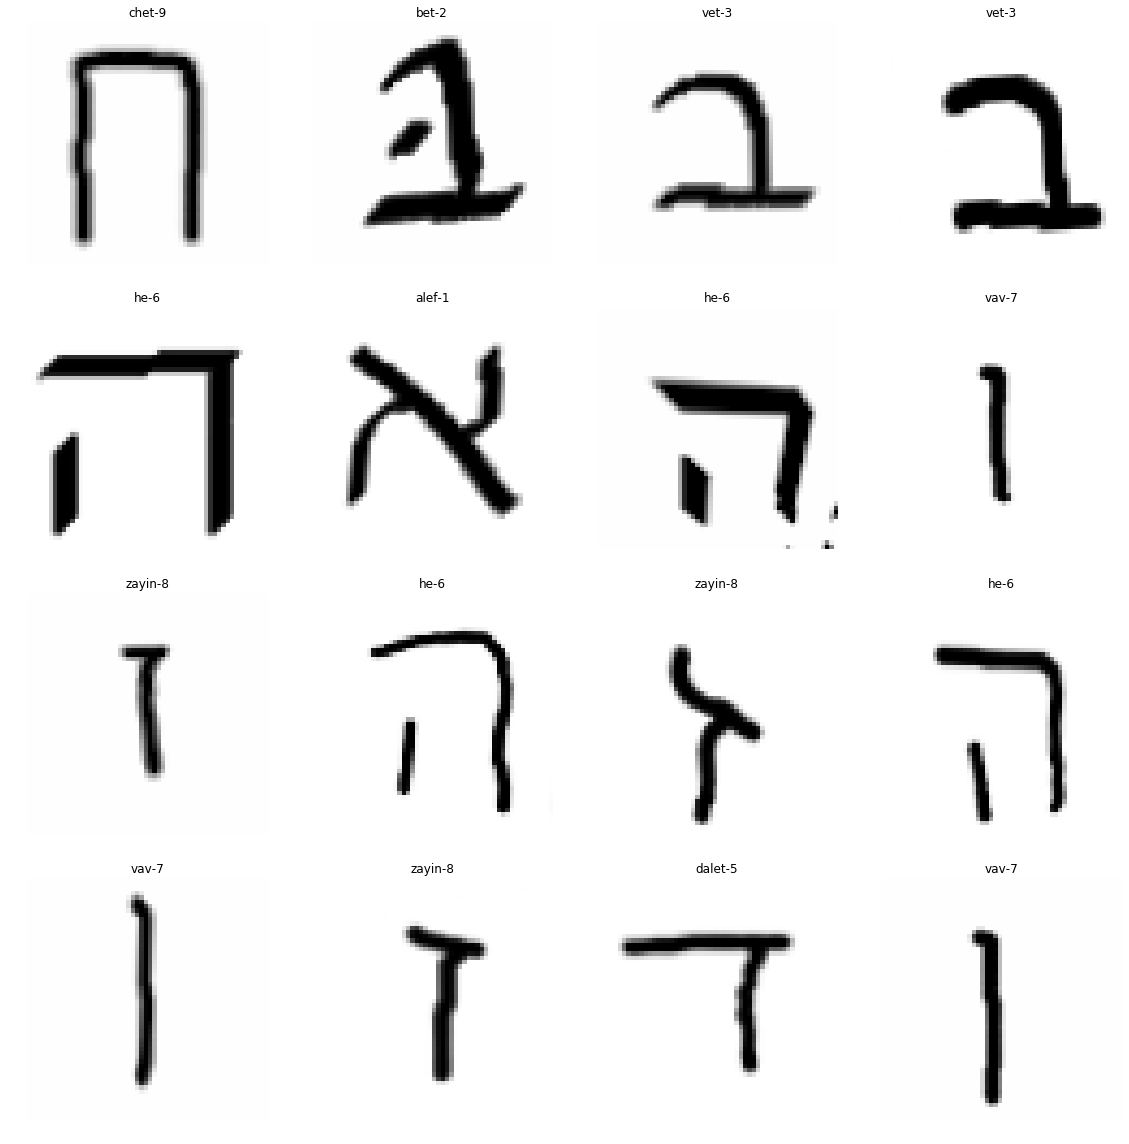

In [11]:
data.show_batch()

## Train model

In [12]:
TMP_PATH = "."
MODEL_PATH = "model/"

learner = cnn_learner(data, models.resnet18, path=TMP_PATH, model_dir=MODEL_PATH, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /tmp/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 50.3MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


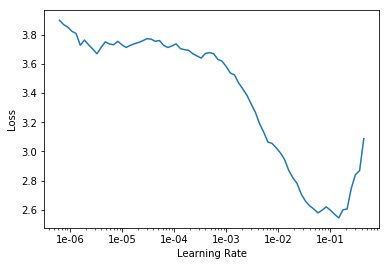

In [13]:
learner.lr_find()
learner.recorder.plot()

In [14]:
lr = 1e-2
learner.fit_one_cycle(20, slice(lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.341733,2.358680,0.722222,0.277778,00:01
1,2.459661,1.471466,0.518519,0.481481,00:01
2,1.801720,1.275617,0.444444,0.555556,00:01
3,1.395281,0.638060,0.166667,0.833333,00:01
4,1.166216,0.613726,0.203704,0.796296,00:01
5,1.081200,0.641510,0.148148,0.851852,00:01
6,1.055127,0.323164,0.129630,0.870370,00:01
7,1.071032,0.254327,0.111111,0.888889,00:01
8,1.012017,0.424192,0.129630,0.870370,00:01
9,0.921494,0.288215,0.055556,0.944444,00:01


### Save model v1.1

In [15]:
learner.save('rn18-st1-56x56') #resnet18, stage1, 56x56 image size

### Unfreeze and get ready for finetuning.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


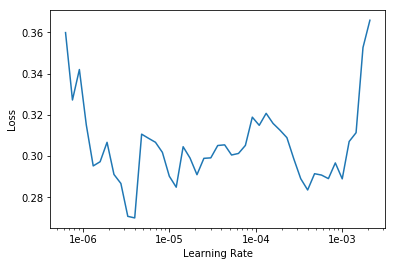

In [16]:
learner.load('rn18-st1-56x56')
learner.unfreeze()
learner.lr_find()
learner.recorder.plot()

### Finetuning (training)

In [17]:
learner.fit_one_cycle(10, slice(6e-3, lr/10))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.760189,1.410877,0.351852,0.648148,00:01
1,1.233840,8.036736,0.666667,0.333333,00:01
2,1.569821,36.632683,0.759259,0.240741,00:01
3,1.350761,1.306053,0.277778,0.722222,00:01
4,1.195068,0.028118,0.018519,0.981481,00:01
5,1.055735,0.171368,0.037037,0.962963,00:01
6,0.854632,0.433617,0.148148,0.851852,00:01
7,0.756858,0.029079,0.018519,0.981481,00:01
8,0.669959,0.044715,0.018519,0.981481,00:01
9,0.600555,0.020540,0.000000,1.000000,00:01


### Save model v1.2

In [18]:
learner.save('rn18-st2-56x56') #resnet18, stage1, 56x56 image size

## Show results

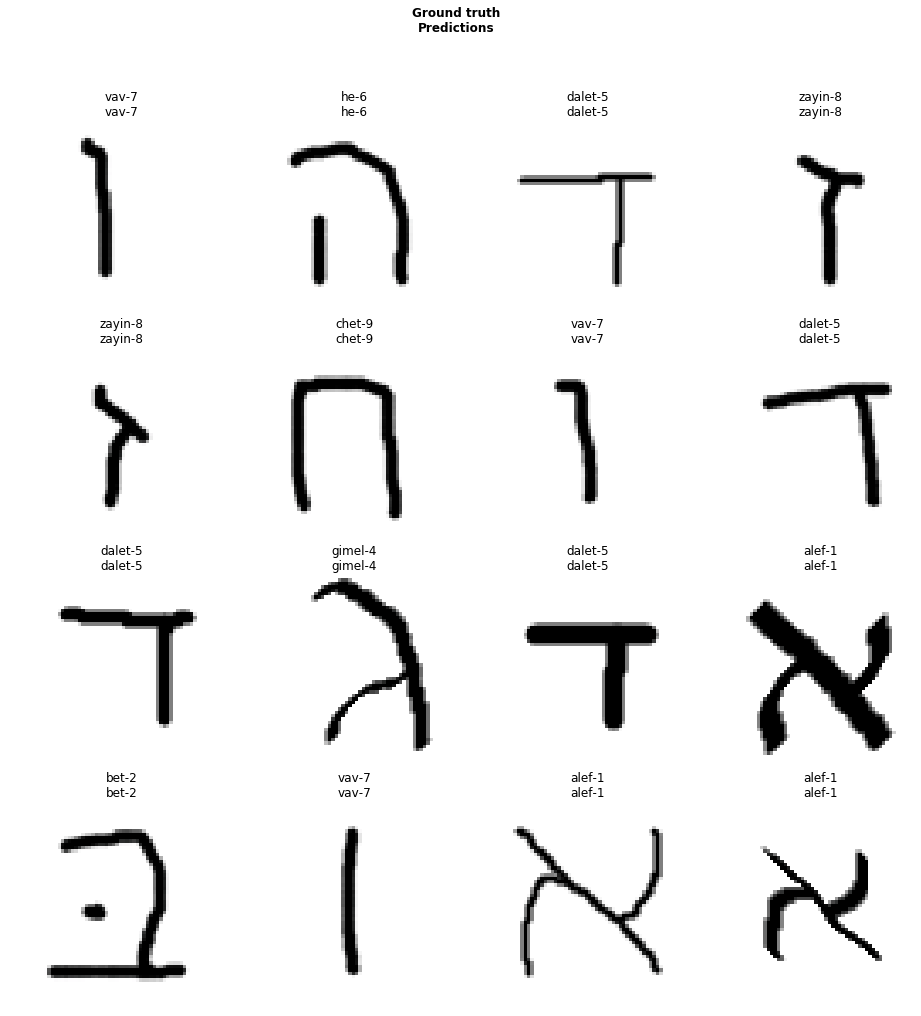

In [19]:
learner.show_results()

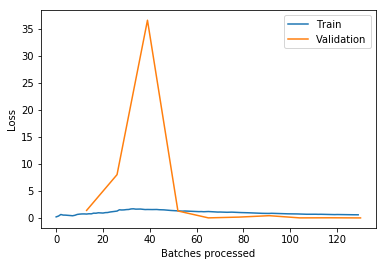

In [20]:
learner.recorder.plot_losses()

## Export model (so we can use the model for inference in another app)

In [21]:
learner.export()

# Interpretation

In [22]:
interp = ClassificationInterpretation.from_learner(learner)

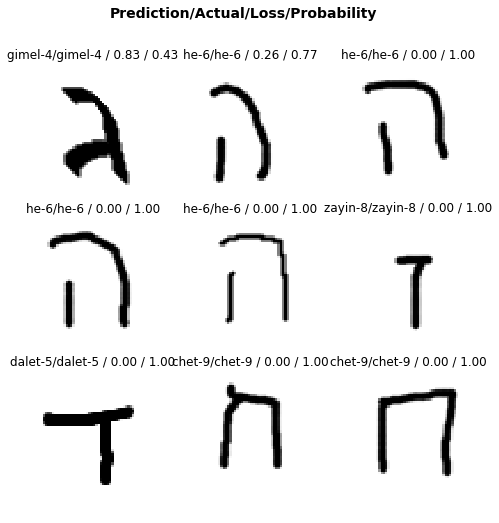

In [23]:
interp.plot_top_losses(9, figsize=(8,8))

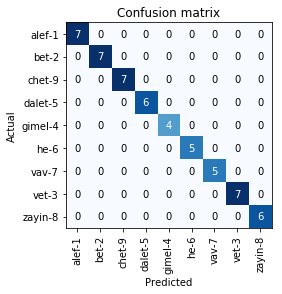

In [24]:
interp.plot_confusion_matrix()

In [25]:
interp.most_confused()

[]